#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

In [80]:
## # Import Required Libraries:

In [81]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


In [82]:
## load the feature and store dataset as dataframe

file_path=r"data/wafer_23012020_041211.csv"
wafers=pd.read_csv(file_path)
print("shape of the feature store dataset",wafers.shape)
wafers.head()


shape of the feature store dataset (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [83]:
wafers.drop(columns=["Unnamed: 0",'Good/Bad']).iloc[:100].to_csv("test.csv",index=False)

In [84]:
# rplace the column Unnamed: 0	as wafer
wafers.rename(columns={"Unnamed: 0":"wafer"},inplace=True)

In [85]:
## Train-test split
from sklearn.model_selection import train_test_split
wafer,wafer_test=train_test_split(wafers,test_size=0.2,random_state=42)

In [86]:
## wafer info
wafers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [87]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,99.000000,100.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,100.000000,100.000000,...,34.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3017.301212,2487.180300,2202.168281,1484.362181,1.180367,100.0,97.449088,0.122195,1.461516,0.000243,...,74.331709,0.499390,0.013615,0.003549,2.727297,0.023510,0.014875,0.004685,77.430241,-0.880000
std,71.819707,66.954212,30.350606,460.985871,0.349654,0.0,5.553324,0.002006,0.071300,0.010610,...,41.857728,0.003431,0.004344,0.000873,0.875848,0.011991,0.007557,0.002527,55.106166,0.477367
min,2825.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.027900,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2973.040000,2446.595000,2189.966700,1111.543600,0.837300,100.0,95.108900,0.120800,1.407375,-0.006925,...,47.356000,0.497300,0.011300,0.003075,2.270425,0.013400,0.009475,0.002700,33.787600,-1.000000
50%,3004.390000,2493.890000,2200.988900,1244.289900,1.156900,100.0,99.513300,0.122200,1.453700,0.001000,...,65.127550,0.499400,0.012750,0.003400,2.546400,0.021800,0.013900,0.003850,62.059500,-1.000000
75%,3070.385000,2527.525000,2213.211100,1963.801600,1.383000,100.0,101.457800,0.123400,1.507425,0.008125,...,99.419050,0.501525,0.014700,0.003825,2.953750,0.028025,0.019200,0.005900,104.303400,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,107.152200,0.126200,1.641100,0.025000,...,223.101800,0.508700,0.043700,0.008900,8.816000,0.054500,0.040100,0.015000,223.101800,1.000000


### Insight:

From the gist of only shown columns, it looks like some of features have pretty bad outliers. One thing is for sure, the data must be standardized.

In [88]:
##Looking at the cats inour trager feature
wafers['Good/Bad'].value_counts()

Good/Bad
-1    94
 1     6
Name: count, dtype: int64

### Insight:

Heavily imbalanced. Definitely gonna need `resampling`.

## # Analyze Missing Data:

Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [89]:
wafers['Good/Bad'].isnull().sum()

0

In [90]:
wafers.isnull().sum().sum()

2306

In [91]:
## Check missing vals in dependent feature variables

wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1))

0.03901861252115059

**=>** Almost 4% out of total cells we're having, are missing.

We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

## # Visualization of Sensors' distribution:

In [92]:
# select random 50 sensor
random_50_sensors_idx=[]
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1,591))

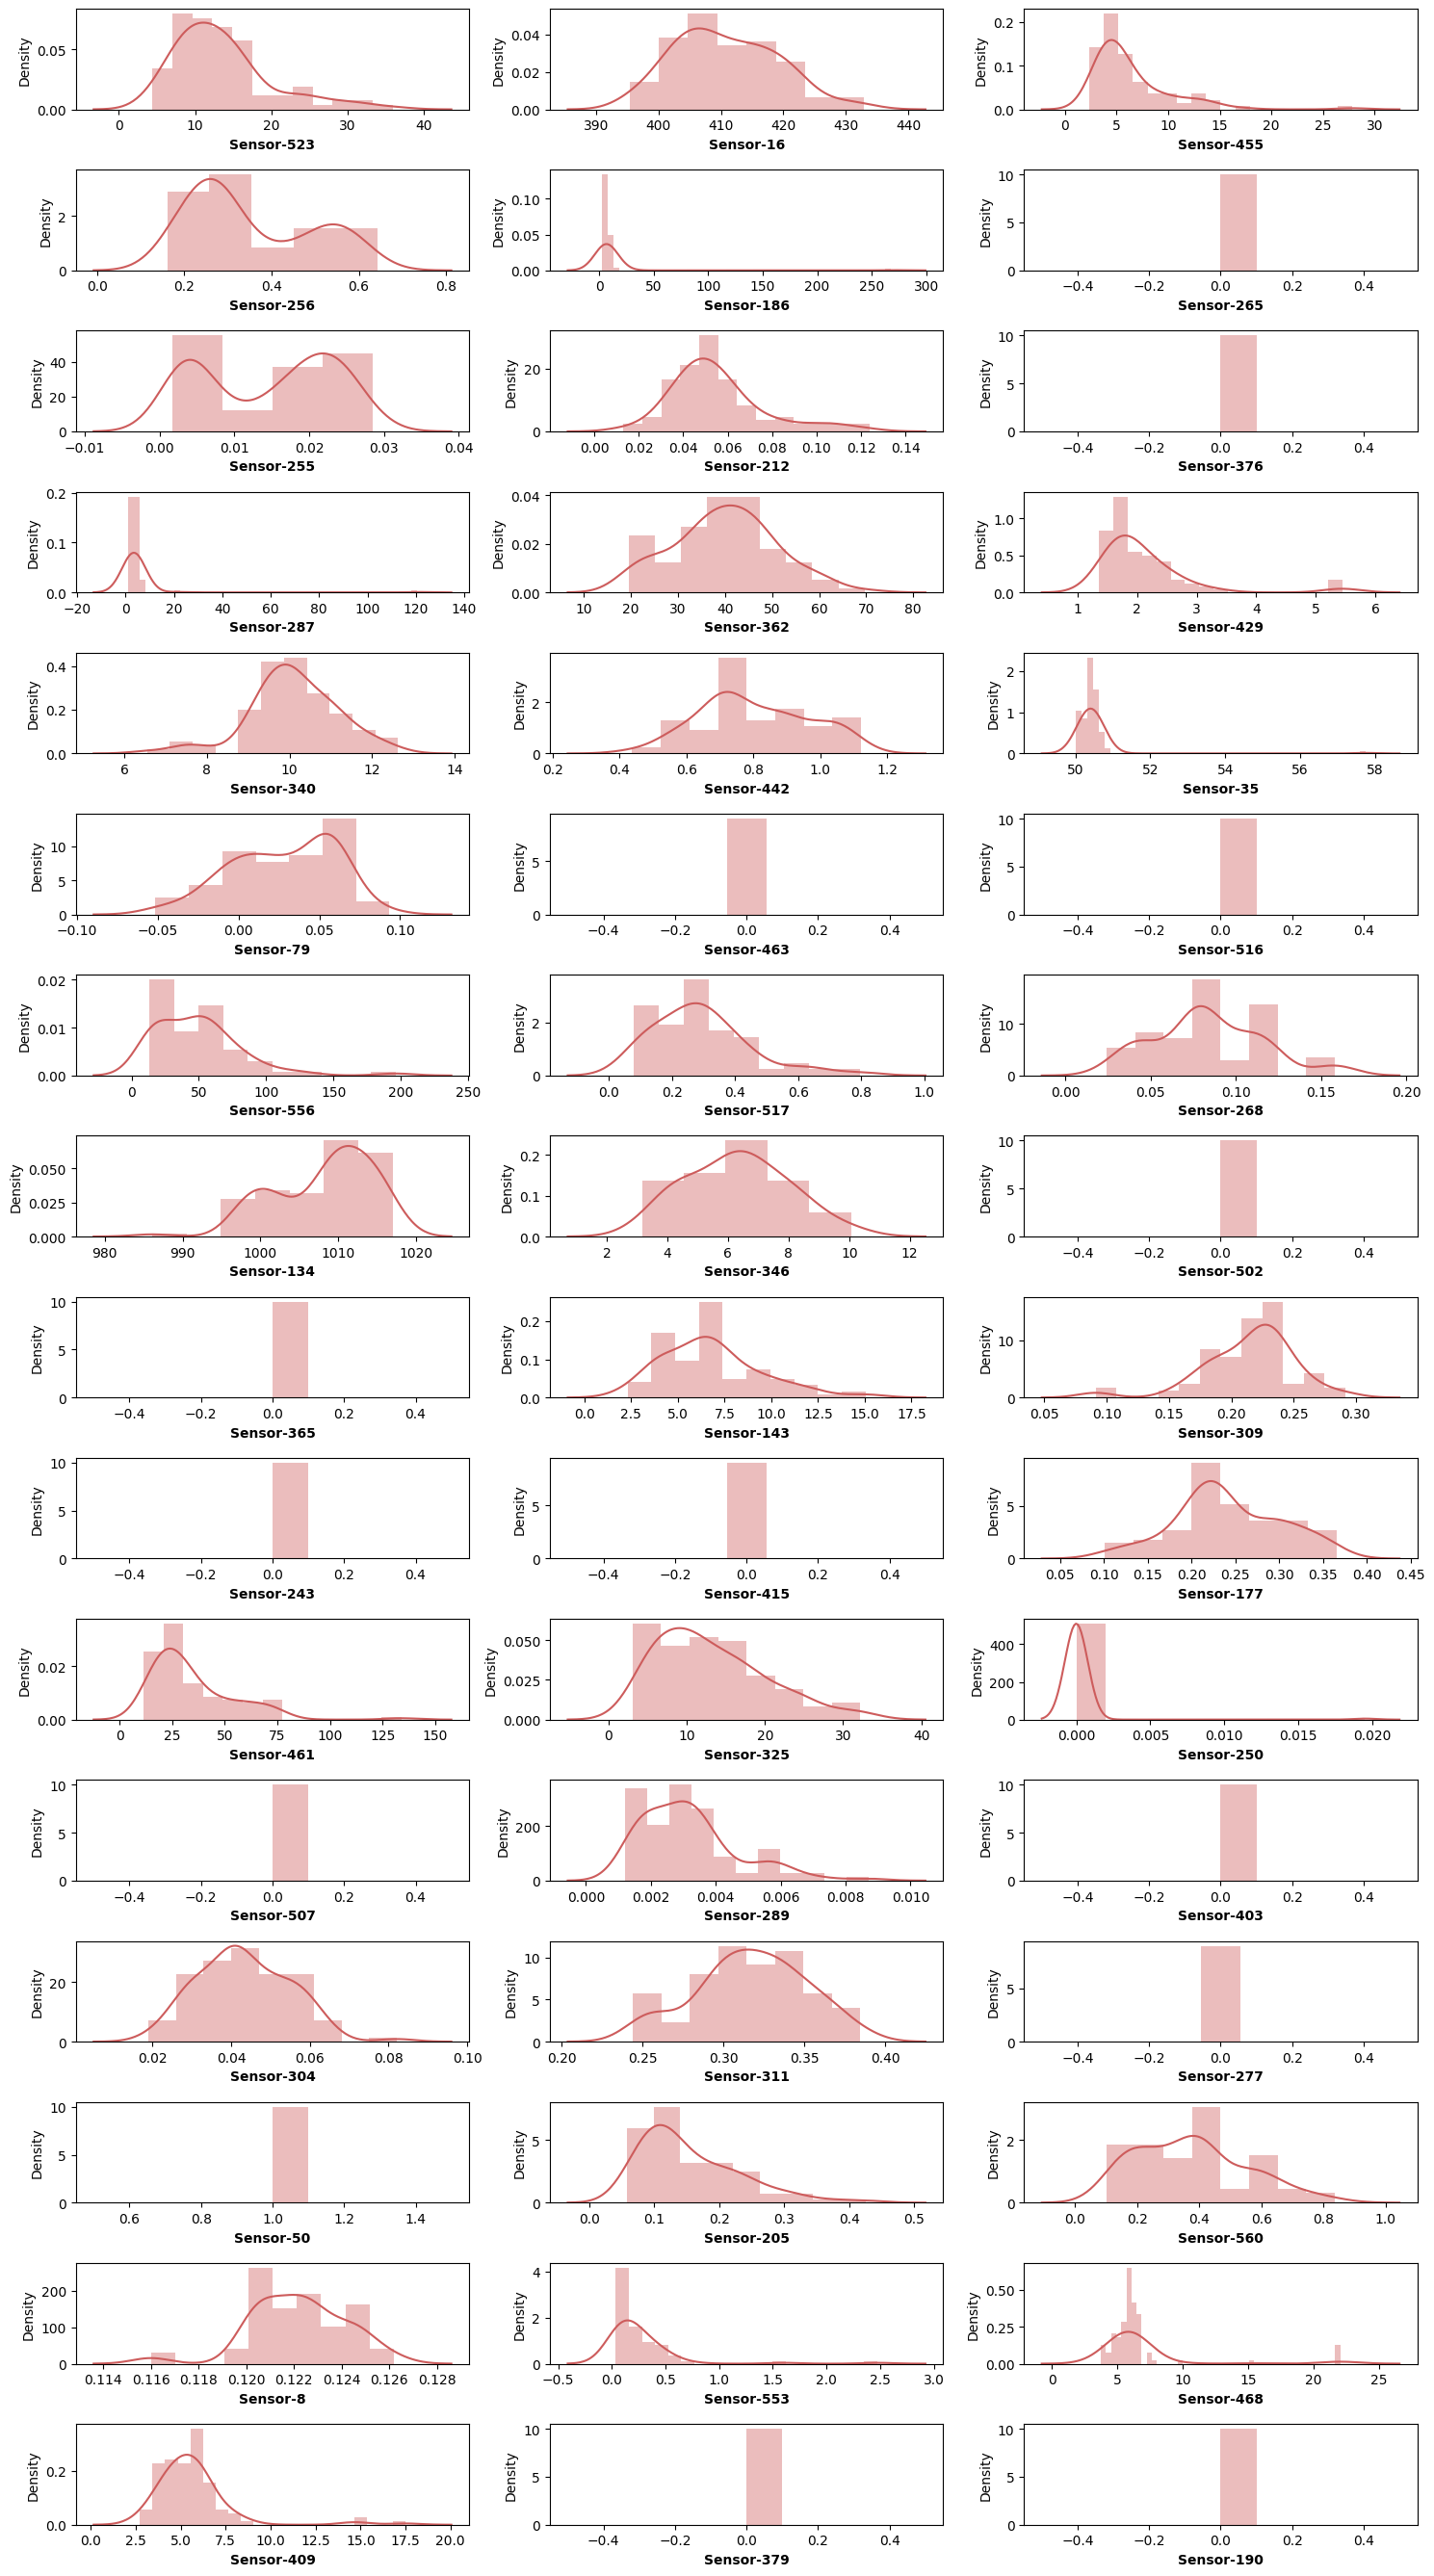

In [93]:
plt.figure(figsize=(15,100))

for i,col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60,3,i+1)
    sns.distplot(x=wafers[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [94]:
def get_cols_with_zero_std_dev(df:pd.DataFrame):
    """
    return a list of columns names who are having zero standard deviation
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df:pd.DataFrame,missing_thres=0.7):
    """
    return a list of columns having missing value more than certain thershold
    """
    cols_missing_ratios=df.isna().sum().div(df.shape[0])
    cols_to_drop=list(cols_missing_ratios[cols_missing_ratios>missing_thres].index)
    return cols_to_drop

In [95]:
## Columns w missing vals more than 70%
cols_to_drop_1=get_redundant_cols(wafers)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [96]:
## columns w missing valie more than 70%
cols_to_drop_2=get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append("wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [97]:
col_to_drop=cols_to_drop_1+cols_to_drop_2

**=>** Features that are not gonna contribute to ML algorithm in anyway, whatsoever.

## # Separate Features and Labels out:

In [98]:
x,y=wafers.drop(col_to_drop,axis=1),wafers["Good/Bad"]

In [99]:
## Dependent feature variables
print("Shape of feature now",x.shape)
x.head()

Shape of feature now (100, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,-0.0040,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,0.0062,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,0.0000,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,-0.0024,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,0.0121,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


**=>** Now, we have 465 contributing features.

In [100]:
## independent and target variable
print("Shape of the label",y.shape)
y.head()

Shape of the label (100,)


0   -1
1    1
2   -1
3   -1
4   -1
Name: Good/Bad, dtype: int64

## # Data Transformation:

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

imputer=KNNImputer(n_neighbors=3)
preprocessing_pipeline=Pipeline(
    steps=[
        ('imputer',imputer),
        ('Scaler',RobustScaler())
    ]
)
preprocessing_pipeline

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [102]:
## Transform "wafers" feature
x_trans=preprocessing_pipeline.fit_transform(x)
print("shape of transform feature set",x_trans.shape)
x_trans

shape of transform feature set (100, 465)


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.515625  ,
        -0.40093   ,  2.        ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.515625  ,
        -0.40093   ,  0.        ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.671875  ,
        -0.44021198,  0.        ],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.671875  ,
        -0.44021198,  2.        ]])

## # Shall we cluster "Wafers" instances?

Let's see whether clustering of data instances do us any good. 

In [103]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [104]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from typing import Tuple
from dataclasses import dataclass


@dataclass
class ClusterDataInstances:
    """Divides the given data instances into different clusters via KMeans Clustering algorithm.

    Args:
        X (np.array): Takes in an array which gotta be clustered.
        desc (str): Description of the said array.
    """
    X: np.array
    desc: str

    def _get_ideal_number_of_clusters(self):
        """Returns the ideal number of clusters the given data instances should be divided into by 
        locating the dispersal point in number of clusters vs WCSS plot.

        Raises:
            e: Raises relevant exception should any kinda error pops up while determining the ideal
            number of clusters.

        Returns:
            int: Ideal number of clusters the given data instances should be divided into.
        """
        try:
            print(
                f'Getting the ideal number of clusters to cluster "{self.desc} set" into..')

            ####################### Compute WCSS for shortlisted number of clusters ##########################
            print("computing WCSS for shortlisted number of clusters..")
            wcss = []  # Within Summation of Squares
            for i in range(1, 11):
                kmeans = KMeans(n_clusters=i, init='k-means++',
                                random_state=42)
                kmeans.fit(self.X)
                wcss.append(kmeans.inertia_)
                print(f"WCSS for n_clusters={i}: {kmeans.inertia_}")
            print(
                "WCSS computed successfully for all shortlisted number of clusters!")

            ################### Finalize dispersal point as the ideal number of clusters #####################
            print(
                "Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..")
            knee_finder = KneeLocator(
                range(1, 11), wcss, curve='convex', direction='decreasing')  # range(1, 11) vs WCSS
            print(
                f"Ideal number of clusters to be formed: {knee_finder.knee}")

            return knee_finder.knee
            ...
        except Exception as e:
            print(e)
            raise e

    def create_clusters(self) -> Tuple:
        """Divides the given data instances into the different clusters, they first hand shoud've been divided into
        via offcourse Kmeans Clustering algorithm.

        Raises:
            e: Raises relevant exception should any kinda error pops up while dividing the given data instances into
            clusters.

        Returns:
            (KMeans, np.array): KMeans Clustering object being used to cluster the given data instances and the given dataset 
            along with the cluster labels, respectively.
        """
        try:
            ideal_clusters = self._get_ideal_number_of_clusters()
            print(
                f"Dividing the \"{self.desc}\" instances into {ideal_clusters} clusters via KMeans Clustering algorithm..")
            kmeans = KMeans(n_clusters=ideal_clusters,
                            init='k-means++', random_state=42)
            y_kmeans = kmeans.fit_predict(self.X)
            print(
                f"..said data instances divided into {ideal_clusters} clusters successfully!")

            return kmeans, np.c_[self.X, y_kmeans]
            ...
        except Exception as e:
            print(e)
            raise e

In [105]:
## Cluster `Wafer` instances

cluster_wafer=ClusterDataInstances(X=x_trans,desc="wafer feature")
clusterer,x_clus=cluster_wafer.create_clusters()

Getting the ideal number of clusters to cluster "wafer feature set" into..
computing WCSS for shortlisted number of clusters..
WCSS for n_clusters=1: 1503049.6472606931
WCSS for n_clusters=2: 512194.0849012661


WCSS for n_clusters=3: 185195.115933283
WCSS for n_clusters=4: 143033.25783274244
WCSS for n_clusters=5: 108688.31540145789
WCSS for n_clusters=6: 88439.04360341988
WCSS for n_clusters=7: 81079.41259322353
WCSS for n_clusters=8: 68622.79634876263
WCSS for n_clusters=9: 61805.44838121718
WCSS for n_clusters=10: 58870.60322516474
WCSS computed successfully for all shortlisted number of clusters!
Finding the ideal number of clusters (by locating the dispersal point) via Elbow method..
Ideal number of clusters to be formed: 3
Dividing the "wafer feature" instances into 3 clusters via KMeans Clustering algorithm..
..said data instances divided into 3 clusters successfully!


In [106]:
## Clusters

np.unique(x_clus[:, -1])

array([0., 1., 2.])

**=>** So the dataset was divided into 3 optimal clusters.

Let's have a look at their shapes..

In [107]:
## Configure "Clustered" array along with target features
wafers_clus = np.c_[x_clus, y]

## Cluster_1 data
wafers_1 = wafers_clus[wafers_clus[:, -2] == 0]
wafers_1.shape

(96, 467)

**=>** Perhaps we were wrong about dividing the `Wafers` dataset into clusters, as we can see pretty much of all datapoints lie in the first cluster itself.

Let's take look at another clusters anyway..

In [108]:
## Cluster_2 data

wafers_clus[wafers_clus[:, -2] == 1].shape

(3, 467)

In [109]:
## Cluster_3 data

wafers_clus[wafers_clus[:, -2] == 2].shape

(1, 467)

**=>** Thus we mustn't divide the dataset into clusters. Not a good idea!

## # Resampling of Training Instances:

Resampling is imperative in this case as the target variable is highly imbalanced.

In [110]:
%pip install imbalanced-learn

In [111]:
from imblearn.combine import SMOTETomek
X,y=x_trans[:,:-1],y
resampler=SMOTETomek(sampling_strategy="auto")
x_res,y_res=resampler.fit_resample(X,y)

In [112]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[x_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 465)
After resampling, Shape of training instances:  (188, 465)


In [113]:
## Target Cats after Resampling

print(np.unique(y_res))
print(f"Value Counts: \n-1: {len(y_res[y_res == -1])}, 1: {len(y_res[y_res == 1])}")

[-1  1]
Value Counts: 
-1: 94, 1: 94


### # Prepare the Test set:

Do exactly the same to test set whatever's been done to the test set.

In [114]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=1/3,random_state=42)

print(f"train set: {x_train.shape, y_train.shape}")
print(f"test set: {x_test.shape, y_test.shape}")

train set: ((125, 464), (125,))
test set: ((63, 464), (63,))


In [115]:
## # Model Selection and Training:

In [116]:
%pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [117]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')

In [118]:
## A function to display Scores

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

### # Evaluating `SVC (kernel='linear')` using cross-validation:

In [121]:
##Prepared training and test sets

X_prep =x_train
y_prep = y_train
X_test_prep = x_test
y_test_prep = y_test

print(X_prep.shape, y_prep.shape)
print(X_test_prep.shape, y_test_prep.shape)

(125, 464) (125,)
(63, 464) (63,)


In [123]:
## SVC rbf Scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [124]:
display_scores(svc_rbf_scores)

Scores:  [1.         1.         0.9047619  1.         1.         1.
 1.         0.97222222 0.94444444 1.        ]
Mean:  0.9821428571428571
Standard Deviation:  0.031208242446082148


In [125]:
## Performance on test set using cross-validation

# Predictions using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test_prep, svc_rbf_preds)
svc_rbf_auc

0.9680527383367141

In [126]:
### # Evaluating `RandomForestClassifier` using cross-validation:

In [127]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, X_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished


In [128]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [129]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, X_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

1.0

In [132]:
from datetime import datetime
datetime.now().strftime('%m_%d_%Y_%H_%M_$S')

'06_12_2023_10_47_$S'